In [41]:
!pip install yfinance
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=e7e6f6c920406a49dc239d68b969bd48487918f01652d54b6f9d1efb4116725c
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [42]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime
import seaborn as sns
import plotly
import cufflinks as cf
import plotly.graph_objs as go
import pandas_ta as ta
cf.go_offline()
%matplotlib inline

In [6]:
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime.today()

# List of tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
#BAC-> Bank of America
#C-> CitiGroup
#GS-> Goldman Sachs
#JPM-> JPMorgan Chase
#MS-> Morgan Stanley
#WFC-> Wells Fargo

# Fetch data
df = yf.download(tickers, start=start, end=end)

# Print the first few rows of the data
print(df.head())

[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                         \
Ticker            BAC          C         GS        JPM         MS        WFC   
Date                                                                           
2009-01-02  11.523494  55.809143  67.129265  21.459528  12.426098  20.118107   
2009-01-05  11.242040  55.340130  68.692169  20.022039  12.886869  18.817133   
2009-01-06  11.483282  58.310352  68.638031  20.453283  14.320364  18.468420   
2009-01-07  11.024917  55.887299  65.380608  19.228003  13.237927  17.348513   
2009-01-08  10.888214  55.965446  66.084686  18.632481  13.764524  17.247919   

Price       Close                                   ...       Open             \
Ticker        BAC          C         GS        JPM  ...         GS        JPM   
Date                                                ...                         
2009-01-02  14.33  71.400002  86.760002  31.350000  ...  84.019997  31.190001   
2009-01-05  13.98  70.800003  88.77

In [7]:
#Concatenating bank dataframes together to a single data frame
bank_data = {}
for ticker in tickers:
    bank_data[ticker] = yf.download(ticker, start=start, end=end)

# Concatenate into a single dataframe
bank_stocks = pd.concat(bank_data, axis=1, keys=tickers)

# Print the first few rows of the concatenated dataframe
print(bank_stocks.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

              BAC                                                     C  \
             Open   High    Low  Close  Adj Close     Volume       Open   
Date                                                                      
2009-01-02  13.92  14.57  13.71  14.33  11.523492   86580700  68.699997   
2009-01-05  14.38  14.55  13.89  13.98  11.242037   93640500  71.199997   
2009-01-06  14.27  14.81  14.07  14.28  11.483281  111015400  72.900002   
2009-01-07  14.11  14.13  13.61  13.71  11.024915  112810000  72.199997   
2009-01-08  13.82  13.99  13.35  13.54  10.888209   93943500  71.000000   

                                             ...         MS             \
                 High        Low      Close  ...        Low      Close   
Date                                         ...                         
2009-01-02  71.599998  67.500000  71.400002  ...  15.750000  16.990000   
2009-01-05  75.000000  70.300003  70.800003  ...  16.780001  17.620001   
2009-01-06  75.900002  72.800

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker    BAC                                                     C  \
Stock Info    Open   High    Low  Close  Adj Close     Volume       Open   
Date                                                                       
2009-01-02   13.92  14.57  13.71  14.33  11.523492   86580700  68.699997   
2009-01-05   14.38  14.55  13.89  13.98  11.242037   93640500  71.199997   
2009-01-06   14.27  14.81  14.07  14.28  11.483281  111015400  72.900002   
2009-01-07   14.11  14.13  13.61  13.71  11.024915  112810000  72.199997   
2009-01-08   13.82  13.99  13.35  13.54  10.888209   93943500  71.000000   

Bank Ticker                                   ...         MS             \
Stock Info        High        Low      Close  ...        Low      Close   
Date                                          ...                         
2009-01-02   71.599998  67.500000  71.400002  ...  15.750000  16.990000   
2009-01-05   75.000000  70.300003  70.800003  ...  16.780001  17.620001   
2009-01-06   75.900002  72.800003  74.599998  ...  18.000000  19.580000   
2009-01-07   74.400002  70.800003  71.500000  ...  17.760000  18.100000   
2009-01-08   73.400002  69.800003  71.599998  ...  17.650000  18.820000   

Bank Ticker                             WFC                                   \
Stock Info   Adj Close    Volume       Open       High        Low      Close   
Date                                                                           
2009-01-02   12.426098  20238000  29.180000  30.469999  28.670000  30.000000   
2009-01-05   12.886869  25421400  29.740000  29.790001  28.059999  28.059999   
2009-01-06   14.320364  38858500  28.670000  28.820000  27.290001  27.540001   
2009-01-07   13.237927  30848100  27.080000  27.180000  23.620001  25.870001   
2009-01-08   13.764524  21116300  25.360001  26.070000  25.110001  25.719999   

Bank Ticker                       
Stock Info   Adj Close    Volume  
Date                              
2009-01-02   20.118097  36522300  
2009-01-05   18.817142  43614200  
2009-01-06   18.468424  54222900  
2009-01-07   17.348509  52631000  
2009-01-08   17.247921  52580100  

[5 rows x 36 columns]

# **EDA**

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     49.380001
C       81.910004
GS     423.850006
JPM    200.300003
MS     108.730003
WFC     65.930000
dtype: float64

In [11]:
returns=pd.DataFrame()

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,-0.024424,-0.008403,0.023283,-0.066986,0.037081,-0.064667
2009-01-06,0.021459,0.053672,-0.000788,0.021538,0.111237,-0.018532
2009-01-07,-0.039916,-0.041555,-0.047458,-0.059906,-0.075587,-0.060639
2009-01-08,-0.012400,0.001399,0.010769,-0.030972,0.039779,-0.005798


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

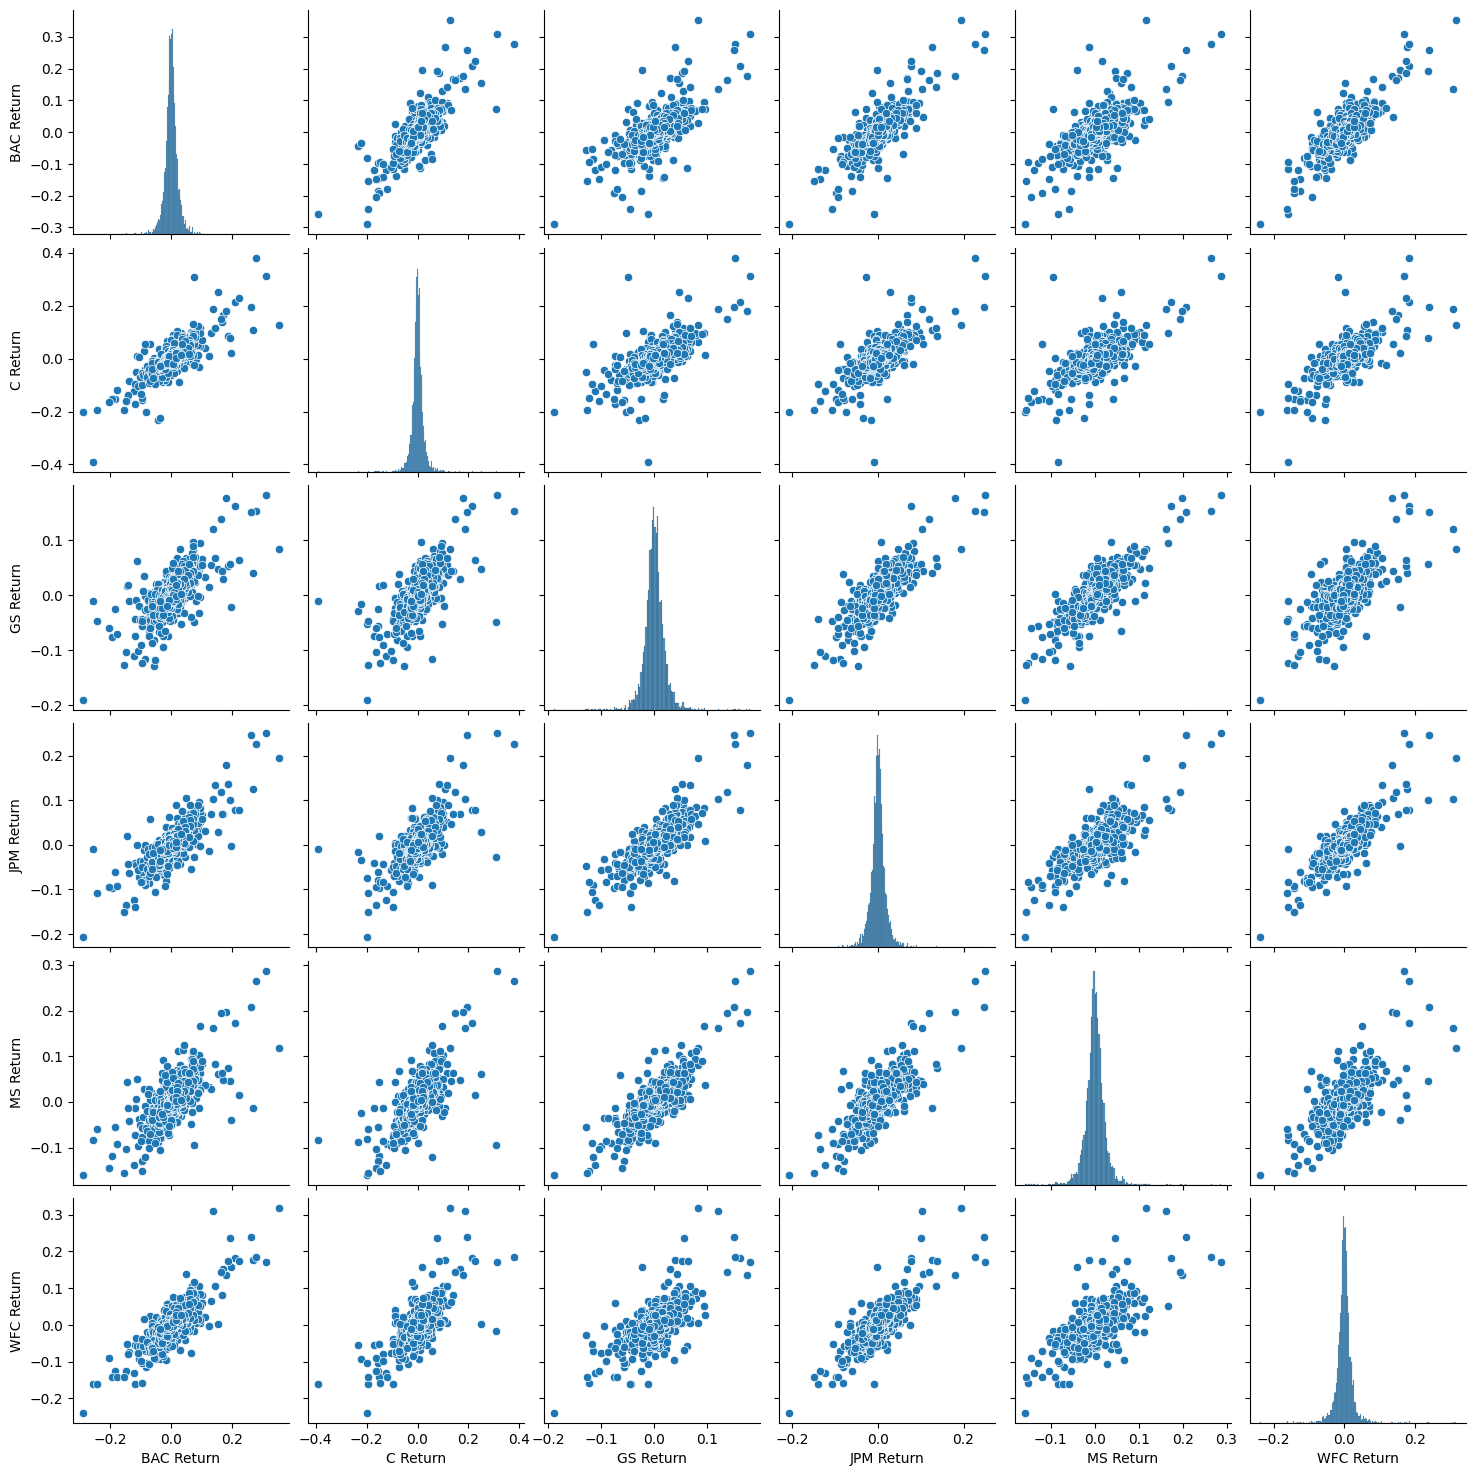

In [13]:
sns.pairplot(returns[1:])

In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2009-01-20
WFC Return   2009-01-20
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2009-03-10
GS Return    2009-01-21
JPM Return   2009-01-21
MS Return    2009-01-21
WFC Return   2009-04-09
dtype: datetime64[ns]

In [16]:
returns.std()

BAC Return    0.028734
C Return      0.029055
GS Return     0.019999
JPM Return    0.021443
MS Return     0.024584
WFC Return    0.024958
dtype: float64

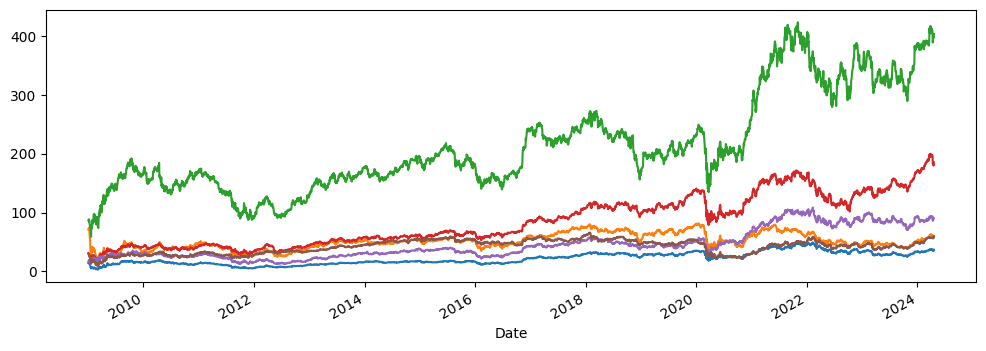

In [18]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)


/opt/conda/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



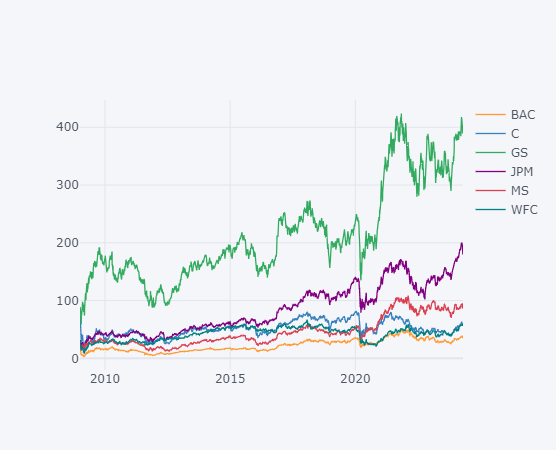

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

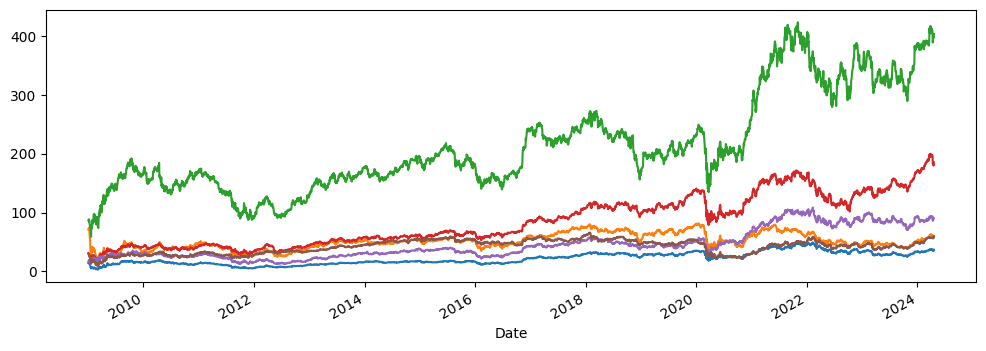

In [22]:
#line plot shoes close price for each bank for the entire index of time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)

# **Rolling 30 day average for Goldman Sachs**

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

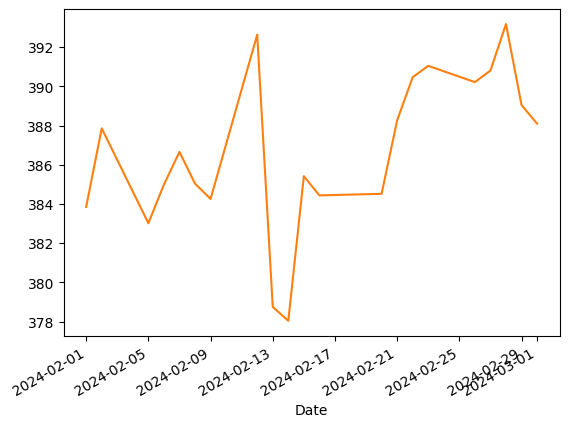

In [30]:

# plt.figure(figsize=(12, 6))
GS = yf.download('GS', start=start, end=end)
# Plotting 30-day moving average
GS['Close'].loc['2024-02-01':'2024-03-01'].rolling(window=30).mean().plot(label='30 Day Avg')

# Plotting GS Close
GS['Close'].loc['2024-02-01':'2024-03-01'].plot(label='GS CLOSE')



# **Heatmap of correlation between stocks Close Price**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

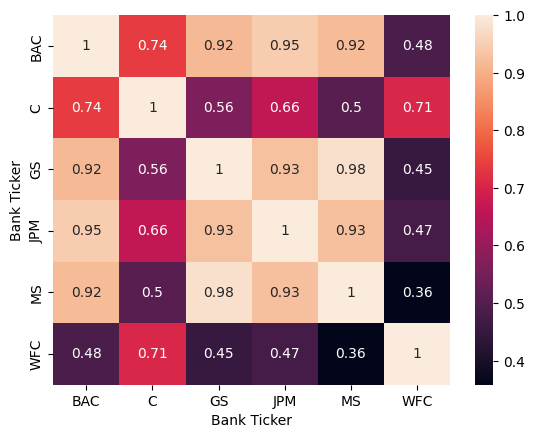

In [31]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Clustering The correlations**

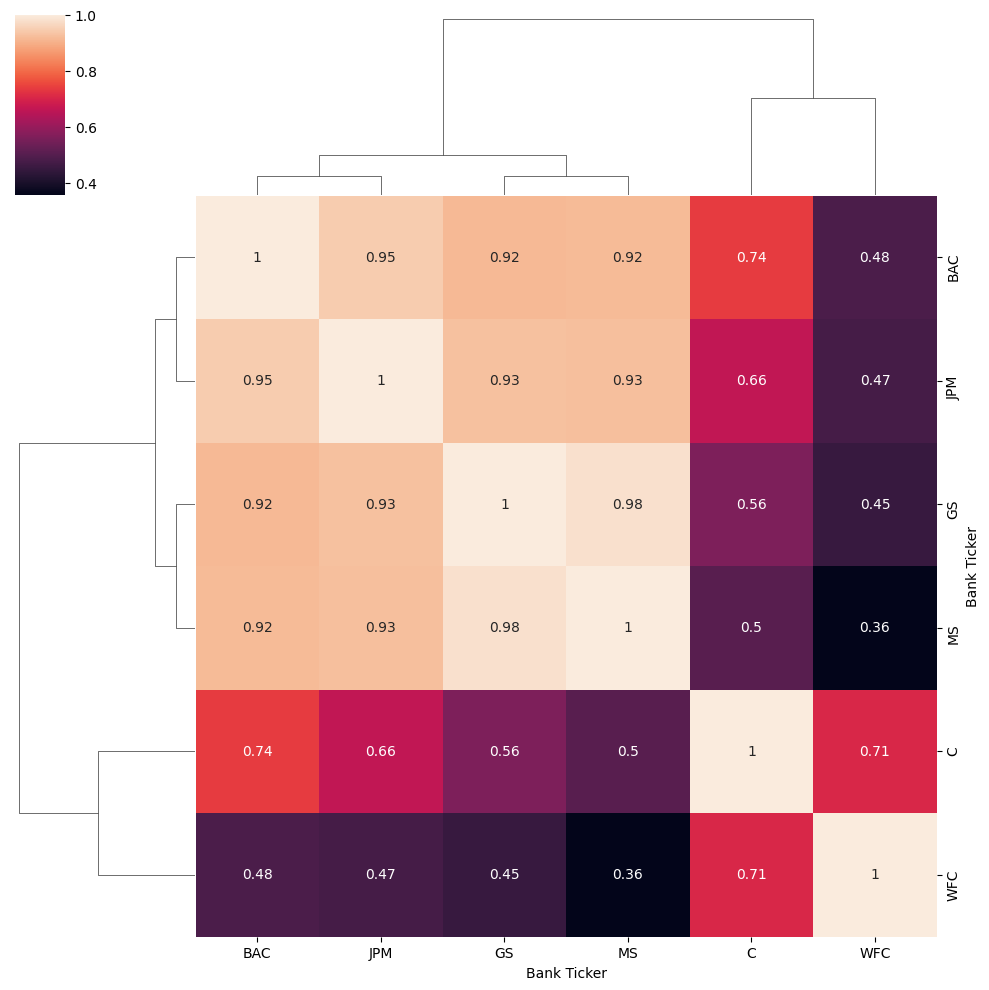

In [32]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

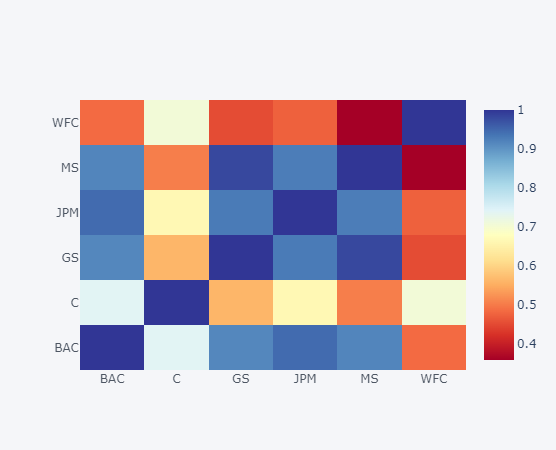

In [33]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# ** candle plot of given tickers stock from Jan 1st 2020 to Jan 1st 2024**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


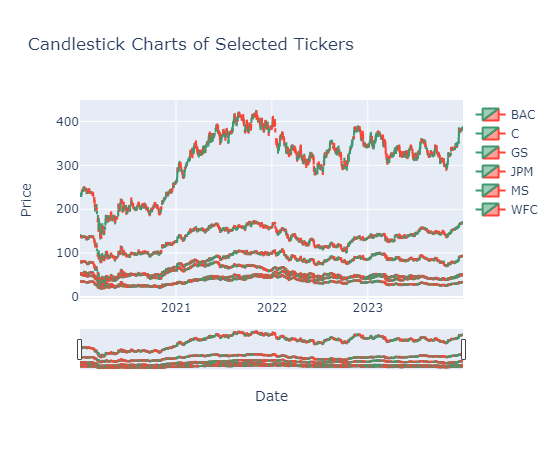

In [38]:
stocks_data = {}
for ticker in tickers:
    stocks_data[ticker] = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Create candlestick plots
candlestick_plots = []
for ticker in tickers:
    candlestick_plots.append(go.Candlestick(x=stocks_data[ticker].index,
                                            open=stocks_data[ticker]['Open'],
                                            high=stocks_data[ticker]['High'],
                                            low=stocks_data[ticker]['Low'],
                                            close=stocks_data[ticker]['Close'],
                                            name=ticker))

# Layout
layout = go.Layout(title='Candlestick Charts of Selected Tickers',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

# Create figure and plot
fig = go.Figure(data=candlestick_plots, layout=layout)

# Display the candlestick plot
plotly.offline.iplot(fig)